---
**A FEW NOTES ON SUBMISSIONS**

+  Don't forget to submit your the PDF reports on Quercus.


+  Please present the results/observations with a table and/or plots where appropriate.


+  **Code styling matters.** 

    Please do not write a line of code that runs over the width of the PDF document. (Remember I can't scroll the code block to see the rest of the line in PDF.) In fact, it is suggested that you limit all lines of Python codes to a maximum of 79 characters in [this Python style guide](https://www.python.org/dev/peps/pep-0008/). You don't need to follow every detail listed on the guide. It is a guide to help you make your code more readable. There are tools that automate formatting as well.
    

+  Before submitting your final code, try 'Restart & Run All' in the Kernel menu of the notebook. 

    Running all code blocks fresh should not throw any errors. Some students had variables that were not defined in the notebook which you likely removed the declaration after running the code.


+  When I 'Restart & Run All' your code on my local machine, it should run without any error. 

    This means all required data files should be included in the git push and your code should not have references to your local drives (e.g., ~/moon/jsc270/tutorial1/...). Possible exceptions are when you use libraries that I don't have. In theses cases, I will install the required libraries and run again.


+  Try to keep your codes as concise and clear as possible.

    There is more than one way of writing codes for a given task.  Please get in the habit of using the appropriate documentations for finding existing methods for any task and/or simply getting a refresher on using a method ([numpy and scipy](https://docs.scipy.org/doc/); [pandas](https://pandas.pydata.org/pandas-docs/stable/)). You are welcome to refer to other people's suggestions available online as long as they are correct. (Not all of them perform the correct tasks.)


Below are some sample answers. For Q6, you were free to be creative as long as you had valid reasoning. (My criteria isn't necessarily better than yours.)

---

# JSC270S - Tutorial \#1 : Hiring algorithms

## Profs. F. Chevalier and N. Taback


## Date: January 16, 2019
## Time: 12:00 - 14:00
## Location: BA 3175


****
## Instructions

- Make a copy of this notebook.

- The notebook should be named: jsc270_tut1_answers_lastname_studentnumber, where "lastname" is your last name, and "studentnumber" is your UofT student number.

- Answer the questions in the cells that indicate where your answers should be placed. Leave the initial comment in the code cell and heading (indicated by `# Answer for qustion XX`).  For example, place your code for Question 1 in the code cell with comment `# Enter your answer for Question 1 into this cell` (remember not to delete this comment).

- Make sure that you explain your solutions when asked and comment your code. 

- Commit and push changes to the Github classroom repository that we has been provided (more details below).


### What should be submitted?

- A *Jupyter notebook* using Python that contains all the data analyses. Make sure to comment your code in the code cells.

- Additional files that your notebook requires to compile properly (e.g. a data file).

- A pdf of your Jupyter notebook exported as a pdf file.  This can be done using [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/install.html).


### When should it be submitted?

*This tutorial consists of a 2-step submission as follows:*

- **At the end of the tutorial (in-lab tutorial assignment)**: Commit and push your notebook to the Github classroom repository that contains your answers (i.e., the file named: jsc270_tut1_answers_lastname_studentnumber.ipynb) before 14:10 on the day of the tutorial, January 16.

- In between January 16, 14:10 p.m. and January 21, 11:30 you should commit and push your answer notebook as you work on the assignment during the week. Commiting and pushing often is good practice (and as a bonus you will have a backup and be able to revisit previous version).

- [`nbdime`](https://nbdime.readthedocs.io/en/latest/) is a Python package that allows you (and the teaching team) to the changes you have made to your assignment. 

- **Homework (tutorial assignment completion)**: Push your completed tutorial by 11:30, Monday, January 21.  Your last commit closest to 11:30 will be considered your final assignment.

### Where should the assignment be submitted?

Push your finished notebook and any other files on Github, through the following link: [https://classroom.github.com/a/VSn3JxaH](https://classroom.github.com/a/VSn3JxaH)

Upload the pdf of your answer notebook to the JSC270 course page on Quercus.

***

## Tutorial Grading

Tutorials will be graded according to the following marking scheme.

<table>
  <tr>
    <th></th>
    <th>Marks</th>
  </tr>
  <tr>
    <td>Tutorial Participation</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Attendance for entire tutorial</td>
    <td>5</td>
  </tr>
  <tr>
    <td>In-lab tutorial assignment</td>
    <td>20</td>
  </tr>
  <tr>
    <td>Tutorial assignment completion</td>
    <td>20</td>
  </tr>
</table>


### Grading Rubric for Tutorial Assignments

Tutorial grading rubric is available [here](https://jsc270.github.io/tut_docs.html#tutorial_grading).


***

## Tutorial objectives
The goal of this tutorial is to design appropriate selection criteria to filter data and reflect on the implications of the solution in the context of a real-world scenario. In this tutorial, you will practice table manipulations, as well as synthetic data generation. More specifically, we will cover the following in this tutorial: 

* Read from, and write to a csv file 
* Use python to extract data entries that satify given criteria
* Use python to create numerical and visual summaries 
* Create statistically meaningful solutions to selection
* Generate a synthetic dataset from given probability distribution functions
* Reflect on implications of automated methods to data selection

<br>

# Fill in your name and student number in this cell

<h2 id="first"> <mark> First Name: Michael </mark> </h2>

<h2 id="last"> <mark> Last Name: Moon </mark> </h2>

<br>

<h2 id="stnum"> <mark> Student Number: 99999999 </mark> </h2>

***
# An algorithm to select the most promising candidates

Imagine you are working for Moogle, a well-known tech company that receives tens of thousands of job applications from graduating seniors every year. Since the company receives too many job applications for Human Resources (HR) to individually assess in a reasonable amount of time, you are asked to create a program that algorithmically analyzes applications and selects the ones most worth passing onto HR.

Since it’s difficult to create these first-pass cuts, Moogle designs their application forms to get some numerical data about their applicants’ education in Computer Science specifically and stores this information in a large [comma-separated value (csv) file](https://en.wikipedia.org/wiki/Comma-separated_values).


### Applicant data

Applicants to a developer position must enter the grades they received in 6 core Computer Science (CS) courses, as well as their overall GPA.  
For example, a student who received the following grades...

> __Intro to CS__: 100  
> __Data Structures__: 95  
> __Software Engineering__: 80  
> __Algorithms__: 89  
> __Computer Organization__: 91  
> __Operating Systems__: 75  
> __Overall GPA__: 83

will appear in the csv file as follows: `cs0001, 100, 95, 80, 89, 91, 75, 83`, where the first index (or attribute), `csc0001` corresponds to the applicant id automatically generated by the system.

The data for 5000 applicants is available in a .csv format, at [CS-apps.csv](CS-apps.csv).

***
## Part 1 - Selecting the best applicants
***

### Loading data from a file

There are several options to choose from to load data from a csv file into a Python data structure. We list two common approaches here:

*Option 1:* Use the python csv library.  
See the documentation on how to read and write csv files using this library [here](https://docs.python.org/3/library/csv.html). A starter code is provided below. 

Here is an example of a basic .csv file:

In [1]:
# !less data.csv

The code below is an example of how you can read data from the `data.csv` file using the python csv library, and display the first and last indexes of each row.

In [2]:
# Please get in the habit of checking ALL code cells 
# and commenting out / removing any that doesn't run
# `git commit`

# import csv
# with open('data.csv', 'r') as csvfile:
#      datareader = csv.reader(csvfile, delimiter=',')
#      for row in datareader:
#          print(row[0], row[3]) #or row[-1] for the last index

*Option 2:* Another option (recommended for this tutorial) is to use the built-in csv reader of pandas (see [pandas documentation](https://pandas.pydata.org/) ).

<br>

**$\Diamond$ Question 1:** Read the csv file [`CS-apps.csv`](CS-apps.csv) into Python.

In [3]:
# Enter your answer for Question 1 into this cell
import pandas as pd                  # import pandas package
apps = pd.read_csv('CS-apps.csv')    # read csv file
apps.head()                          # show first 5 lines

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
1,cs0001,83,97,75,88,98,90,80
2,cs0002,87,86,71,89,89,64,90
3,cs0003,97,85,67,82,79,77,75
4,cs0004,97,89,93,85,82,77,98


### Write Python code to select the most promising candidates

**$\Diamond$ Question 2.a:** Select applicants whose overall GPA is at least 85.  

In [4]:
# Enter your answer for Question 2.a into this cell
gpa_ge_85 = apps[apps['GPA'] >= 85]
gpa_ge_85.head(10) # shows first 10 lines instead of default 5

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
2,cs0002,87,86,71,89,89,64,90
4,cs0004,97,89,93,85,82,77,98
8,cs0008,90,80,72,84,74,63,89
12,cs0012,86,83,63,92,93,63,91
13,cs0013,83,91,96,84,89,79,89
21,cs0021,89,64,61,82,62,62,100
22,cs0022,85,86,89,88,82,79,86
27,cs0027,88,83,94,87,80,80,94
29,cs0029,89,83,65,89,92,81,89


**$\Diamond$ Question 2.b:** Select applicants who have no grade below 65.  

In [5]:
# Enter your answer for Question 2.b into this cell
courses = list(apps.columns[1:7])
all_ge_65 = apps[(apps[courses] >= 65).all(axis=1)]
# what does (pandas object).all(axis=1) do?
all_ge_65.head(10)

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
1,cs0001,83,97,75,88,98,90,80
3,cs0003,97,85,67,82,79,77,75
4,cs0004,97,89,93,85,82,77,98
5,cs0005,93,83,93,85,78,90,83
6,cs0006,83,82,85,84,84,78,73
10,cs0010,87,91,70,83,96,67,64
13,cs0013,83,91,96,84,89,79,89
14,cs0014,94,90,72,85,87,66,66
18,cs0018,85,86,90,87,88,78,80


In [6]:
# an alternative using apply
import numpy as np
all_ge_65_flg = apps.apply(
    lambda row: np.all(row[courses] >= 65),
    axis=1
)
all_ge_65_alt = apps[all_ge_65_flg]
all_ge_65_alt.head(10)

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
1,cs0001,83,97,75,88,98,90,80
3,cs0003,97,85,67,82,79,77,75
4,cs0004,97,89,93,85,82,77,98
5,cs0005,93,83,93,85,78,90,83
6,cs0006,83,82,85,84,84,78,73
10,cs0010,87,91,70,83,96,67,64
13,cs0013,83,91,96,84,89,79,89
14,cs0014,94,90,72,85,87,66,66
18,cs0018,85,86,90,87,88,78,80


In [7]:
# another alternative using a user-defined function
def check_all_ge(row, cutoff=65):
    return np.all(row[courses] >= cutoff)

all_ge_65_alt_2 = apps[apps.apply(check_all_ge, axis=1)]
all_ge_65_alt_2.head(10)

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
1,cs0001,83,97,75,88,98,90,80
3,cs0003,97,85,67,82,79,77,75
4,cs0004,97,89,93,85,82,77,98
5,cs0005,93,83,93,85,78,90,83
6,cs0006,83,82,85,84,84,78,73
10,cs0010,87,91,70,83,96,67,64
13,cs0013,83,91,96,84,89,79,89
14,cs0014,94,90,72,85,87,66,66
18,cs0018,85,86,90,87,88,78,80


In [8]:
# yet another alternative adopted from students' submissions
all_ge_65_alt_3 = apps[apps[courses].min(axis=1) >= 65]
all_ge_65_alt_3.head(10)

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
1,cs0001,83,97,75,88,98,90,80
3,cs0003,97,85,67,82,79,77,75
4,cs0004,97,89,93,85,82,77,98
5,cs0005,93,83,93,85,78,90,83
6,cs0006,83,82,85,84,84,78,73
10,cs0010,87,91,70,83,96,67,64
13,cs0013,83,91,96,84,89,79,89
14,cs0014,94,90,72,85,87,66,66
18,cs0018,85,86,90,87,88,78,80


In [9]:
# checking if the results match
print(
    'All results match.' if all([
        all_ge_65.shape == all_ge_65_alt.shape,
        all_ge_65.shape == all_ge_65_alt_2.shape,
        all_ge_65.shape == all_ge_65_alt_3.shape
    ]) else 'Mismatch found.'
)

All results match.


**$\Diamond$ Question 2.c:** Select applicants who have at least 4 grades strictly above 85.  

In [10]:
# Enter your answer for Question 2.c into this cell
# Adopted from students' submissions
four_gt_85 = apps[(apps[courses] > 85).sum(axis=1) >= 4]
four_gt_85.head(10)

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
1,cs0001,83,97,75,88,98,90,80
2,cs0002,87,86,71,89,89,64,90
9,cs0009,90,94,91,82,94,62,81
18,cs0018,85,86,90,87,88,78,80
37,cs0037,94,86,93,84,92,76,63
54,cs0054,92,87,85,91,92,73,73
55,cs0055,94,90,82,86,91,67,81
69,cs0069,89,100,67,81,96,89,98
74,cs0074,94,94,86,82,100,78,95
78,cs0078,97,93,89,86,93,65,80


**$\Diamond$ Question 2.d:** Select applicants who have an average of CS grades strictly above 75.

In [11]:
# Enter your answer for Question 2.d into this cell
cs_gt_75 = apps[apps[courses].mean(axis=1) >  75]
cs_gt_75.head(10)

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0000,91,87,93,82,81,75,100
1,cs0001,83,97,75,88,98,90,80
2,cs0002,87,86,71,89,89,64,90
3,cs0003,97,85,67,82,79,77,75
4,cs0004,97,89,93,85,82,77,98
5,cs0005,93,83,93,85,78,90,83
6,cs0006,83,82,85,84,84,78,73
7,cs0007,96,74,69,88,64,76,74
8,cs0008,90,80,72,84,74,63,89
9,cs0009,90,94,91,82,94,62,81


In [12]:
# check
cs_gt_75[courses].mean(axis=1).min()

75.16666666666667

**$\Diamond$ Question 3:** For each of the above algorithms, answer the following questions:
* The criteria in questions 2.a - 2.d define the "cut".  How many applicants made the cut?  What percentage of the application pool made the cut?
* Were applicants 'cs0270' and 'cs2537' selected?
* Explain your answer in a few sentences.

In [13]:
# Code cell for question 3
# store total count
total_count = apps.shape[0]
# helper functions
def percent_selected(selected, total):
    """
    Return the percentage of selected over total applicants.
    """
    return 100 * selected.shape[0] / total

def is_selected(selected, app_id):
    """
    Return True if the app_id in selected.
    """
    return app_id in selected['ID'].values

# store results and their descriptions in lists
result_texts = [
    'overall GPA of at least 85.',
    'no grade below 65.',
    'at least four grades above 85.',
    'average of CS courses above 75.'
]
results = [
    gpa_ge_85, 
    all_ge_65,
    four_gt_85,
    cs_gt_75    
]

In [14]:
# print as a table
res = np.zeros((4, 4))
for res_ind, res_df in enumerate(results):
    res[res_ind,:] = [
        res_df.shape[0],
        percent_selected(res_df, total_count),
        is_selected(res_df, 'cs0270'),
        is_selected(res_df, 'cs2537')
    ]
print('Answers in table.')
print(pd.DataFrame(
    res, index=result_texts, columns=[
        'Count', 'Percentage', 'cs0270', 'cs2537'
    ]
))

Answers in table.
                                  Count  Percentage  cs0270  cs2537
overall GPA of at least 85.      1990.0       39.80     0.0     0.0
no grade below 65.               2935.0       58.70     1.0     0.0
at least four grades above 85.    892.0       17.84     0.0     0.0
average of CS courses above 75.  4695.0       93.90     1.0     1.0


In [15]:
# print for the markdown cell
print('Answers in markdown (copied and pasted in the cell below).')
for res_txt, row in zip(result_texts, res):
    print("####", res_txt.upper())
    print(
        '+   '
        + str(int(row[0])), '(' + str(row[1])
        +"%) applicants had", res_txt
    )
    print(
        "+   Applicant 'cs0270'", 
        'is selected.' 
        if row[2]
        else 'is not selected.'
    )
    print(
        "+   Applicant 'cs2537'", 
        'is selected.' 
        if row[3]
        else 'is not selected.'
    )
    print('')

Answers in markdown (copied and pasted in the cell below).
#### OVERALL GPA OF AT LEAST 85.
+   1990 (39.8%) applicants had overall GPA of at least 85.
+   Applicant 'cs0270' is not selected.
+   Applicant 'cs2537' is not selected.

#### NO GRADE BELOW 65.
+   2935 (58.7%) applicants had no grade below 65.
+   Applicant 'cs0270' is selected.
+   Applicant 'cs2537' is not selected.

#### AT LEAST FOUR GRADES ABOVE 85.
+   892 (17.84%) applicants had at least four grades above 85.
+   Applicant 'cs0270' is not selected.
+   Applicant 'cs2537' is not selected.

#### AVERAGE OF CS COURSES ABOVE 75.
+   4695 (93.9%) applicants had average of CS courses above 75.
+   Applicant 'cs0270' is selected.
+   Applicant 'cs2537' is selected.



# Answer for question 3

#### OVERALL GPA OF AT LEAST 85.
+   1990 (39.8%) applicants had overall GPA of at least 85.
+   Applicant 'cs0270' is not selected.
+   Applicant 'cs2537' is not selected.

#### NO GRADE BELOW 65.
+   2935 (58.7%) applicants had no grade below 65.
+   Applicant 'cs0270' is selected.
+   Applicant 'cs2537' is not selected.

#### AT LEAST FOUR GRADES ABOVE 85.
+   892 (17.84%) applicants had at least four grades above 85.
+   Applicant 'cs0270' is not selected.
+   Applicant 'cs2537' is not selected.

#### AVERAGE OF CS COURSES ABOVE 75.
+   4695 (93.9%) applicants had average of CS courses above 75.
+   Applicant 'cs0270' is selected.
+   Applicant 'cs2537' is selected.

### Are we doing things right?  — Creating numerical and visual summaries of the data

The above algorithms are pretty naive. Let's see if we can do better. First, let's have a look at what our data looks like. To do so, we are going to analyse our data more closely.  

*Visual summaries*: Visualize distributions of grades using [matplotlib](https://matplotlib.org/).

**$\Diamond$ Question 4.a:** Plot the distribution of grades in the "Intro to CS" course. What do you observe?  

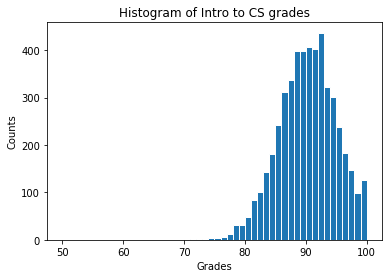

In [16]:
#code for 4.a.
# using pandas.plot.hist()
import matplotlib.pyplot as plt
%matplotlib inline  
plt.figure()
apps['Intro to CS'].plot.hist(
    ec='white',
    bins=range(50,101,1)
)
plt.title('Histogram of Intro to CS grades')
plt.xlabel('Grades')
plt.ylabel('Counts');

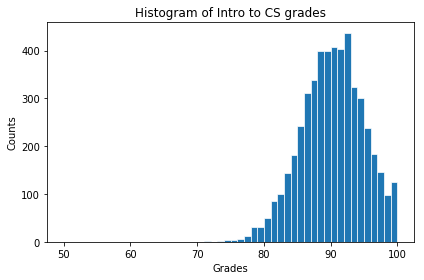

In [17]:
# using matplotlib's hist()
fig, ax = plt.subplots()
n, bins, patches = ax.hist(
    apps['Intro to CS'],
    bins=range(50,101,1),
    edgecolor='white',
    linewidth=0.7
)
ax.set_xlabel('Grades')
ax.set_ylabel('Counts')
ax.set_title('Histogram of Intro to CS grades')
fig.tight_layout()
plt.show()

# Answer for question 4.a 

- Most grades are above 80 and none below 70.
- Unimodal distribution with a slighly skewed bell shape.

**$\Diamond$ Question 4.b:** Plot the distribution of grades in the "Operating systems" course. What do you observe?  

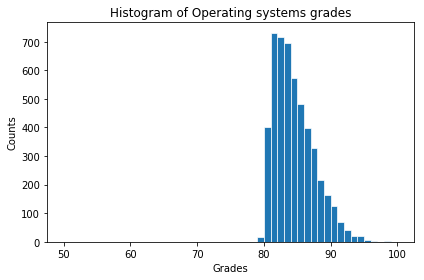

In [18]:
# code for 4.b.
fig, ax = plt.subplots()
n, bins, patches = ax.hist(
    apps['Operative systems'],
    bins=range(50,101,1),
    edgecolor='white',
    linewidth=0.7
)
ax.set_xlabel('Grades')
ax.set_ylabel('Counts')
ax.set_title('Histogram of Operating systems grades')
fig.tight_layout()
plt.show()

# Answer for question 4.b.

-  Almost all grades above 80 with a very few 79.
-  Majority of grades between 80 and 85 with a few above 90.

**$\Diamond$ Question 4.c:** Repeat 4.b. for the remaining courses. What can you conclude?

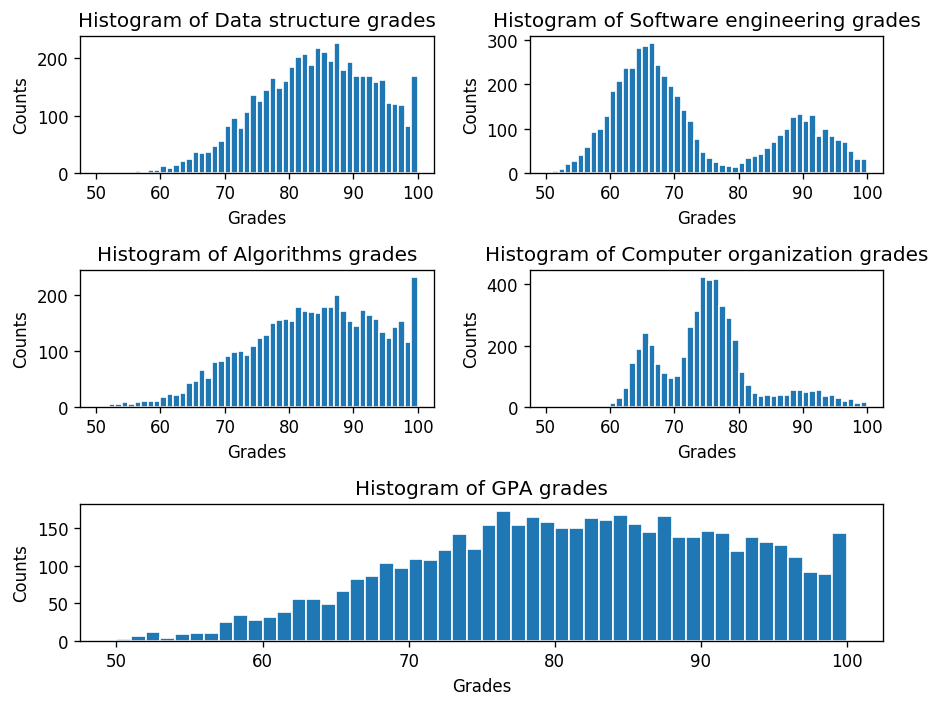

In [19]:
# code for 4.c.
# adjust plot area size
fig = plt.figure(
    figsize=(8, 6),
    dpi=120,
    facecolor='w'
)

# place the plots on a 3 x 3 grid
bins = range(50,101,1) # use common sized bins
loc = 321
for crs in (courses + ['GPA']):
    if crs in ['Intro to CS', 'Operative systems']:
        continue
    plt.subplot(loc)
    if crs=='GPA':
        plt.subplot(313)
    plt.hist(
        apps[crs], bins,
        ec='w'
    )
    plt.xlabel('Grades')
    plt.ylabel('Counts')
    plt.title('Histogram of ' + crs + ' grades')
    loc += 1
plt.tight_layout();

# Answer for question 4.c.

- Software engineering and computer organization have two peaks in their distributions.
- There are quite a few students who obtained perfect grades either in Data structure of Algorithms.

*Numerical summaries*: Calculate simple statistics.

* See documentatation for `pandas` [descriptive statistics functions](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)
* See documentation for `numpy` [descriptive statistics functions](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html#averages-and-variances)

**$\Diamond$ Question 5.a:** Using the pandas method [`describe`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html), generate statistical summaries for each course.  

In [20]:
# enter code for question 5.a.
apps.describe().round(2)
# the method only outputs summaries for numeric columns by default

,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,89.76,83.81,72.32,84.00,83.33,74.73,80.89
std,4.67,8.90,12.34,3.01,10.11,7.69,10.74
min,71.00,50.00,50.00,79.00,50.00,59.00,50.00
25%,87.00,78.00,63.00,82.00,76.00,70.00,73.00
50%,90.00,84.00,68.00,83.00,84.00,75.00,81.00
75%,93.00,91.00,85.00,86.00,91.00,78.00,89.00
max,100.00,100.00,100.00,98.00,100.00,100.00,100.00


**$\Diamond$ Question 5.b:** Generate the `min`, `max`, `mean`, `std`, `lower quartile`, `second quartile (median)`, `upper quartile`, `10% percentile` values for "Operating systems" and "Overall GPA". For this question, you must use the dedicated function for each value (i.e., don't use `describe`). 

In [21]:
# enter code for question 5.b.
# use apply + pd.Series to output a dataframe
stats_np = apps[['Operative systems', 'GPA']].apply(
    lambda col: pd.Series({
        'min': np.min(col),
        'max': np.max(col),
        'mean': np.mean(col),
        'std': np.std(col),
        '25%': np.percentile(col, 25),
        '50%': np.median(col),
        '75%': np.percentile(col, 75),
        '90%': np.percentile(col, 90)
    })
).T.reset_index().rename(columns={'index':'course'})
stats_np.round(2)

,course,min,max,mean,std,25%,50%,75%,90%
0,Operative systems,79.0,98.0,84.00,3.01,82.0,83.0,86.0,88.0
1,GPA,50.0,100.0,80.89,10.74,73.0,81.0,89.0,95.0


### Improved algorithm

**$\Diamond$ Question 6:** Use your data analyses in questions 4 and 5 to develop a new criteria (i.e., different from the criteria given in question 2) to select to select the top applicants.  Describe the reasoning behind your new criteria and why your new criteria improves the selection process.

# Answer for question 6


##### 1. Give scores for each course according to the following scheme:
1. **Intro to CS**  
    Not included in the new criteria since all students did well. Also, it is an introductory course which may not represent the applicant's current (assuming all applicants are in their final year or already working) level of CS.

    - 0 for all 
    

2. **Operating systems**  
    Not included in the new criteria since all students did well. The grades had the smallest variance among all courses.

    - 0 for all 
    

3. **Data structure/Algorithms/GPA**  
    Use intervals based on mean and std for the unimodal distributions. There were a few students who had perfect grades. These student will be awarded a score of 5 for each course.

    - 5 if perfect grade
    - 4 if above mean + std but not perfect
    - 3 if between mean and mean + std
    - 2 if between mean and mean - std
    - 1 if between mean and mean - 2 x std
    - 0 otherwise
    

4. **Software engineering/Computer organization**  
    Use the intervals below to distinguish applicants who are in the upper bell curve from those in the lower bell curve.

    - 5 if above 90/75
    - 4 if above 80/70
    - 2 if above 65/65
    - 0 otherwise
    
 
##### 2. Sum the scores 
##### 3. Cut the top 20th percentile



**$\Diamond$ Question 7:** Write a program using Python that returns a new list of worthwhile candidates.  How different is your list compared to the list using the criteria in question 2?  

In [22]:
# code for question 7
# scoring functions
def score_unimodal(col):
    """
    Return scores for unimodal distributions.
    i.e. data structure/algorithms/GPA
    """
    _mean = col.mean()
    _std = col.std()
    return [
        5 if grade == 100
        else 4 if grade > _mean + _std
        else 3 if grade > _mean
        else 2 if grade > _mean - _std
        else 1 if grade > _mean - 2*_std
        else 0
        for grade in col
    ]

def score_bimodal(grade, intervals):
    """
    Return scores for bimodal distributions.
    i.e. Software engineering/computer organization
    """
    if grade > intervals[0]:
        return 5
    if grade > intervals[1]:
        return 4
    if grade > intervals[2]:
        return 2
    return 0

def score_sw(col):
    """
    Return scores fo software engineering grades.
    """
    intervals = [90, 80, 65]
    return [
        score_bimodal(grade, intervals)*1.0017
        for grade in col
    ]
def score_co(col):
    """
    Return scores fo computer organization grades.
    """
    intervals = [75, 70, 65]
    return [
        score_bimodal(grade, intervals)*1.0017
        for grade in col
    ]

# compute the scores and select top 1,000 applicants
def score_custom(applicants):
    scores = applicants[
        ['Data structure', 'Algorithms', 'GPA']
    ].apply(score_unimodal).sum(axis=1)

    sw_scores = score_sw(applicants['Software engineering'])
    co_scores = score_co(applicants['Computer organization'])

    return(scores + sw_scores + co_scores)

# select top nth percentile applicants
def select_custom(applicants, n=20):
    scores = score_custom(applicants)
    applicants['score'] = scores

    # select the top 20 percentiles
    return applicants[(scores >= np.percentile(scores, 100-n))]

selected = select_custom(apps)
selected.head()

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA,score
0,cs0000,91,87,93,82,81,75,100,19.0153
1,cs0001,83,97,75,88,98,90,80,17.0119
4,cs0004,97,89,93,85,82,77,98,19.0170
5,cs0005,93,83,93,85,78,90,83,17.0170
6,cs0006,83,82,85,84,84,78,73,16.0153


In [23]:
# pring for markdown
for ind, _res in enumerate(results):
    print('####', result_texts[ind].upper(), '####')
    num_common = _res.merge(selected, how='inner').shape[0]
    print('+  ', num_common, 'applicants overlap.')
    print('+  ', str(
            round(100*num_common/_res.shape[0],2)
        )
        + '% of the original criteria.'
    )
    print('+  ', str(
            round(100*num_common/selected.shape[0],2)
        )
        + '% of the new criteria.'
    )
    print('')

#### OVERALL GPA OF AT LEAST 85. ####
+   587 applicants overlap.
+   29.5% of the original criteria.
+   53.61% of the new criteria.

#### NO GRADE BELOW 65. ####
+   1064 applicants overlap.
+   36.25% of the original criteria.
+   97.17% of the new criteria.

#### AT LEAST FOUR GRADES ABOVE 85. ####
+   487 applicants overlap.
+   54.6% of the original criteria.
+   44.47% of the new criteria.

#### AVERAGE OF CS COURSES ABOVE 75. ####
+   1095 applicants overlap.
+   23.32% of the original criteria.
+   100.0% of the new criteria.



# Answer for question 7

#### OVERALL GPA OF AT LEAST 85. ####
+   587 applicants overlap.
+   29.5% of the original criteria.
+   53.61% of the new criteria.

#### NO GRADE BELOW 65. ####
+   1064 applicants overlap.
+   36.25% of the original criteria.
+   97.17% of the new criteria.

#### AT LEAST FOUR GRADES ABOVE 85. ####
+   487 applicants overlap.
+   54.6% of the original criteria.
+   44.47% of the new criteria.

#### AVERAGE OF CS COURSES ABOVE 75. ####
+   1095 applicants overlap.
+   23.32% of the original criteria.
+   100.0% of the new criteria.

**$\Diamond$ Question 8:** Briefly describe the tradeoffs of your selection criteria versus the criteria in question 2.

# Answer for question 8

-  Not all selected applicants are well-rounded (GPA >= 85).
-  All selected applicants are well-versed in CS.
-  Sensitive to software engineering and computer organization grades.
-  ...

***
## Part 2 - Generate a synthetic dataset
***

Before adopting your algorithm, HR wants to test your proposed algorithm, and compare it against a third-party solution on different, larger datasets. To do so, they ask you to write code for them to generate synthetic data with the following properties.

* **Introduction to CS:**  
  * normal distribution $N(90, 5^2)$

* **Data structures:**
  * normal distribution $N(85,10^2)$

* **Software engineering** (renowned as either you're good at it, either you're weak):
  * typically  $30\%$ of the population has strong results: normal distribution  $N(90,5^2)$ 
  * the rest is weaker: normal distribution $N(65,5^2)$ 

* **Algorithms:**
  * strong correlation with data structures, typically within the same (10 points) range

* **Computer organization:**
  * normal distribution  $N(75,15^2)$ 
  * some exceptional grades (3% of the population):  $N(95,2^2)$ 
  * some very low grades (10% of the population):  $N(60,15^2)$ 

* **Operating systems:**
  * [skew normal distribution](https://en.wikipedia.org/wiki/Skew_normal_distribution) $\alpha=10$, $\xi=80$ , $\omega=5$ 

* **GPA**
  * about half of the population is "average": normal distribution  $N(75,10^2)$  
  * the other half is "strong": normal distribution $N(90,10^2)$

### Simulate data and replicate workflow

**$\Diamond$ Question 9:** Write a program using Python to simulate grades and GPA with the above properties.  
*Advice: you are strongly encouraged to define reusable functions for this exercise.* Here is an example of a function that returns the absolute value of a number: 

```python
    def absolute(x):
        if x < 0:
            return -x
        else:
            return x
```

In [24]:
# enter code for question 9
from scipy.stats import skewnorm

# define functions for simulating grades
def gen_normal(mu, sigma, size):
    """
    Return a numpy array of normally distributed grades.
    """
    array = np.random.normal(mu, sigma, size)
    grades = np.around(array).astype('int')
    
    # Replace values outside the range
    while not all(g >= 50 and g <= 100 for g in grades):
        grades = np.extract(
            (grades >= 50) & (grades <= 100),
            grades
        )
        new_array = np.random.normal(mu, sigma, size-len(grades))
        new_grades = np.around(new_array).astype('int')
        grades = np.append(grades, new_grades)
    return grades

def gen_bimodal(p, mus, sigmas, size):
    """
    Return a numpy array for software engineering grades.
    
    argumens:
        p(float): Pr(Z=1)
        mus(list): mu's [mu_0, mu_1] where mu_i is
            mu | z = i
        sigmas(list): sigma^2's [sigma_0, sigma_1]
            where sigma_i is sigma^2 | z = i
        size(int): sample size
    """
    z = np.random.binomial(1, p, size) # simulate z's
    y = np.zeros(size)
    
    # enumerate(np.array) returns 
    # index and value per iteration
    for ind, val in enumerate(z):
        # Replace values outside the range
        while y[ind] < 50 or y[ind] > 100:
            y[ind] = np.random.normal(
                mus[val], sigmas[val]
            )
    
    return np.around(y).astype('int')

def gen_trimodal(ps, mus, sigmas, size):
    """
    Return a numpy array for comupter organization grades.
    
    argumens:
        ps(list): [Pr(Z=0), Pr(Z=1)]
        mus(list): mu's [mu_0, mu_1, mu_2] where mu_i is
            mu | z = i
        sigmas(list): sigma^2's [sigma_0, sigma_1, sigma_2]
            where sigma_i is sigma^2 | z = i
        size(int): sample size
    """
    probs = ps + [1 - np.sum(ps)]
    z = np.random.choice(
        [0,1,2], size, p=probs
    )
    y = np.zeros(size)
    
    for ind, val in enumerate(z):
        # Replace values outside the possible range
        while y[ind] < 50 or y[ind] > 100:
            y[ind] = np.random.normal(
                mus[val], sigmas[val]
            )
    return np.around(y).astype('int')

def gen_skewnorm(alpha, loc, scale, size):
    """
    Return a numpy array of grades distrubed in skewed normal.
    """
    vals = np.arange(50,101,1)       # create an array of possible grades
    p = skewnorm.pdf(vals, alpha, loc, scale) # generate the associated probabilities
    p /= p.sum()
    
    return np.random.choice(vals, size, p=p)

def gen_correlated(corr_to, deviation):
    """
    Return a numpy array of grades correlated to 'corr_to'.
    """
    devs = np.random.randint(
        -deviation, deviation, len(corr_to)
    )
    y = corr_to + devs
    
    for ind, val in enumerate(y):
        # Replace values outside the possible range
        while y[ind] < 50 or y[ind] > 100:
            y[ind] = corr_to[ind] + np.random.randint(
                -deviation, deviation
            )
    return y

In [25]:
def gen_apps(size):
    """
    Generate a pandas dataframe based on the specification.
    """
    # generated applicant ids as 'cs#####'
    num_pads = np.ceil(np.log10(size)).astype('int') + 1
    ids = [
        'cs' + str(x).zfill(num_pads) for x in np.arange(size)
    ]
    # generate grades for each course 
    # based on the given distributions
    int_to_cs = gen_normal(90, 5^2, size)
    data_struc = gen_normal(85, 10^2, size)
    soft_eng = gen_bimodal(
        0.3, [65, 90], [5^2, 5^2], size
    )
    comp_org = gen_trimodal(
        [.03, .1], [95, 60, 75], [2^2, 15^2, 15^2], size
    )
    oper_sys = gen_skewnorm(
        10, 80, 5, size
    )
    gpa = gen_bimodal(
        0.5, [75, 90], [10^2, 10^2], size
    )
    algo = gen_correlated(
        data_struc, 10
    )
    generated = pd.DataFrame({
        'ID': ids,
        'Intro to CS': int_to_cs,
        'Data structure': data_struc,
        'Software engineering': soft_eng,
        'Computer organization': comp_org,
        'Algorithms': algo,
        'Operating systems': oper_sys,
        'GPA': gpa
    })
    
    return generated

**$\Diamond$ Question 10:** Generate a random sample of 10000 applicants, and save these grades into a new csv file, prefixing each applicant with their id (e.g. `'cs09320'`). Run the algorithms of Part 1 on this new dataset.  

In [26]:
# enter code for question 10
# setting random seed allows replication of the exact same result
np.random.seed(190116) 
simulated_apps = gen_apps(10000)
# save to csv
simulated_apps.to_csv('simulated.csv', index=False)
simulated_apps.head()

,ID,Intro to CS,Data structure,Software engineering,Computer organization,Algorithms,Operating systems,GPA
0,cs00000,83,85,88,66,81,88,93
1,cs00001,91,84,56,76,86,92,87
2,cs00002,87,81,85,70,72,82,84
3,cs00003,79,87,54,80,78,87,83
4,cs00004,85,79,67,90,72,81,90


In [27]:
# apply the custom criteria
simulated_selected = select_custom(simulated_apps)
simulated_selected.head()

,ID,Intro to CS,Data structure,Software engineering,Computer organization,Algorithms,Operating systems,GPA,score
7,cs00007,87,85,98,97,88,87,60,16.0170
10,cs00010,81,89,89,76,91,83,96,19.0153
12,cs00012,82,82,68,83,88,81,92,16.0119
17,cs00017,90,94,90,82,92,84,76,18.0153
26,cs00026,93,75,83,82,80,85,99,16.0153


In [28]:
simulated_selected.describe().round(2)

,Intro to CS,Data structure,Software engineering,Computer organization,Algorithms,Operating systems,GPA,score
count,2002.00,2002.00,2002.00,2002.00,2002.00,2002.00,2002.00,2002.00
mean,88.98,88.63,83.64,82.53,89.01,84.05,85.34,17.51
std,6.09,5.85,10.69,8.17,6.76,3.11,9.10,1.37
min,69.00,70.00,55.00,58.00,66.00,79.00,57.00,16.01
25%,85.00,85.00,73.00,76.00,85.00,82.00,79.00,16.02
50%,89.00,89.00,86.00,82.00,90.00,83.00,86.00,17.02
75%,94.00,93.00,92.75,89.00,94.00,86.00,93.00,18.02
max,100.00,100.00,100.00,100.00,100.00,99.00,100.00,23.02


### Limitations 
**$\Diamond$ Question 11:** Comment on the potential limitations of the above approach to generating synthetic data.



# Answer for question 11

+  Distributions used can be arbitrary or subjective
+  Correlation between courses are not well represented
+  ...

*** 
## Part 3. Reflections

Now that you feel good about your algorithm, let's highlight some of those applicants and reveal the stories between them. 

> **Story 1: Misread the Instructions**  
What if an excellent applicant thinks they should put in letter grades?
>
> `[‘A’, ‘A’, ‘A’, ‘A’, ‘A’, ‘A’, ‘A’]`
>
> … or how about their grades on 4-point scale?
>
> `[4, 3.9, 4, 4, 3.95, 4, 3.9]`

> **Story 2: Bad Assumptions**  
> What if one of your applicants skipped Intro to Computer Science? When they saw your form, they froze, and decided that putting -1 in the input field would make it obvious…
>
> `[-1, 95, 99, 94, 96, 98, 95]`

> **Story 3: Mistake in the Input**  
> What if one of your applicants accidentally put in a number > 100?
>
> `[681, 68, 73, 70, 81, 91, 59]`
>
> That might seem easy enough for a program to catch, but what if they accidentally dropped a 0?
>
> `[100, 100, 100, 100, 100, 100, 10]`
>
> A person would catch that mistake easily, does your algorithm?

> **Story 4: The Awful Semester**  
> What if your applicant had a medical emergency one semester? Or a personal tragedy?
>
> `[95, 93, 50, 91, 98, 90, 90]`

> **Story 5: Inverse Trajectories**  
> What if one of your applicants came from an underprivileged background and really struggled at the beginning of college… but showed extraordinary growth by the end?
> 
> `[65, 75, 85, 95, 100, 100, 80]`
> 
> What if one of your applicants came to college with extraordinary potential? They easily aced their first few classes and then gradually grew apathetic about their education - getting nothing but barely-passing grades by the time they were a senior?
> 
> `[100, 100, 95, 85, 75, 65, 80]`
> 
> Does your algorithm treat them equally? 

<br>


**$\Diamond$ Question 12:**  For each of the above stories, reflect on whether you think that your algorithm does the right thing. If not, how could you improve it? Explain what you would change in a few sentences.   

# Answer for question 12


#### Story 1:
+  Not handled by the current algorithm.
+  May consider rejecting such applications as the applicants failed to follow the instructions.
+  Could consider these cases separately when the applicants seem extremely qualified.
+  Sometimes it's difficult to justify translating letter grades/4.0 scale grades to percentages since different institutions may use different scales.

#### Story 2:
+  Not handled by the current algorithm.
+  Again we could consider isolating these cases.

#### Story 3:
+  Not handled by the current algorithm.
+  Consider rejecting applications with obvious mistakes (grades > 100 or < 50) as the applicants failed to input grades properly.

#### Story 4:
+  The applicant will not be selected because the algorithm is sensitive to Software engineering grades as demonstrated in the cell below.

#### Story 5:
+  The applicant who showed growth will be selected as the algorithm does not care about Intro to CS and Operating systems grades
+  Result demonstrated in the cell below.

In [29]:
# add applicants as described by story 4 and 5
apps_reflection = pd.concat([
    apps,
    pd.DataFrame({
        'ID': ['story04-1', 'story04-2', 'story05-1', 'story05-2'],
        courses[0]: [95, 95, 65, 100],
        courses[1]: [93, 50, 75, 100],
        courses[2]: [50, 94, 85, 95],
        courses[3]: [91, 91, 95, 85],
        courses[4]: [98, 98, 100, 75],
        courses[5]: [90, 90, 100, 65],
        'GPA': [90, 90, 80, 80]
    })
], ignore_index=True, sort=False)
# score using the custom criteria
apps_reflection['score'] = score_custom(apps_reflection)
apps_reflection['selected'] = (
    apps_reflection['score'] >= np.percentile(
        apps_reflection['score'], 80
    )
)
# print result
apps_reflection[['ID', 'score', 'selected']].tail(4)

,ID,score,selected
5000,story04-1,16.0085,False
5001,story04-2,17.0170,True
5002,story05-1,18.0153,True
5003,story05-2,14.0085,False


**$\Diamond$ Question 13:** Explain what precautions for writing such an automated selection algorithm should be taken in a real setting and why.

# Answer for question 13

- Enter your answer in this cell.
- You may remove this text.

### Bonus Question (worth up to 2 extra points)

**$\Diamond$ Question 14:** Implement the changes to your algorithm to properly account for the different stories above. To put your solution to test, tweak the csv file manually to introduce some cases above, and make sure you take note of what participant has what story for validation.
<br>
<br>

In [30]:
# code for bonus question 

# Answer for bonus question

- Enter your answer in this cell.
- You may remove this text.